# Stellar Classification

First part is adapted from:
https://www.kaggle.com/code/fernandolima23/hrdiagram

Your task is to analyze the data from the Hertzsprung–Russell diagram. To make it easier, we have have here an example how to upload data. There are two tasks (see the end of the file), you only need to solve one. The first one is simpler, the second one should be more beneficial to you (it is a better training). The preparation of the data is for the first task. 

Let us first import libraries and upload the necessary data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_orig = pd.read_csv("data/astro/hipparcos-voidmain.csv")
pd.set_option("display.max_columns", 10)
print(data_orig.shape)
data_orig.head(10) #number of printed lines

(118218, 78)


,Catalog,HIP,Proxy,RAhms,DEdms,...,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,...,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,...,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,...,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,...,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,...,C-41 15372,P-41 9991,0.95,G8III,2
5,H,6,NaN,00 00 04.35,+03 56 47.4,...,NaN,NaN,1.55,M0V:,S
6,H,7,NaN,00 00 05.41,+20 02 11.8,...,NaN,NaN,0.79,G0,S
7,H,8,NaN,00 00 06.55,+25 53 11.3,...,NaN,NaN,4.82,M6e-M8.5e Tc,G
8,H,9,NaN,00 00 08.48,+36 35 09.4,...,NaN,NaN,1.00,G5,S
9,H,10,NaN,00 00 08.70,-50 52 01.5,...,C-51 13738,P-51 12065,0.51,F6V,2


In [3]:
data_orig.columns.values.tolist()

['Catalog',
 'HIP',
 'Proxy',
 'RAhms',
 'DEdms',
 'Vmag',
 'VarFlag',
 'r_Vmag',
 'RAdeg',
 'DEdeg',
 'AstroRef',
 'Plx',
 'pmRA',
 'pmDE',
 'e_RAdeg',
 'e_DEdeg',
 'e_Plx',
 'e_pmRA',
 'e_pmDE',
 'DE:RA',
 'Plx:RA',
 'Plx:DE',
 'pmRA:RA',
 'pmRA:DE',
 'pmRA:Plx',
 'pmDE:RA',
 'pmDE:DE',
 'pmDE:Plx',
 'pmDE:pmRA',
 'F1',
 'F2',
 '---',
 'BTmag',
 'e_BTmag',
 'VTmag',
 'e_VTmag',
 'm_BTmag',
 'B-V',
 'e_B-V',
 'r_B-V',
 'V-I',
 'e_V-I',
 'r_V-I',
 'CombMag',
 'Hpmag',
 'e_Hpmag',
 'Hpscat',
 'o_Hpmag',
 'm_Hpmag',
 'Hpmax',
 'HPmin',
 'Period',
 'HvarType',
 'moreVar',
 'morePhoto',
 'CCDM',
 'n_CCDM',
 'Nsys',
 'Ncomp',
 'MultFlag',
 'Source',
 'Qual',
 'm_HIP',
 'theta',
 'rho',
 'e_rho',
 'dHp',
 'e_dHp',
 'Survey',
 'Chart',
 'Notes',
 'HD',
 'BD',
 'CoD',
 'CPD',
 '(V-I)red',
 'SpType',
 'r_SpType']

In [4]:
data_orig.loc[0:20,"SpType"]
#data_orig.loc[0:20,"Plx"]

0               F5
1              K3V
2               B9
3              F0V
4            G8III
5             M0V:
6               G0
7     M6e-M8.5e Tc
8               G5
9              F6V
10              A2
11           K4III
12           K0III
13              K0
14              K2
15             F3V
16             NaN
17              K5
18              G5
19              G0
20              K2
Name: SpType, dtype: object

For the first task you will need these columns:

In [5]:
data = data_orig.loc[:,["Vmag", "Plx", "B-V"]][data_orig.loc[:,["Vmag", "Plx", "B-V"]]["Plx"]>0]
#data = data_orig.loc[:,["Vmag", "Plx", "B-V"]]
print(data.shape)
print(data[0:15])

(113710, 3)
     Vmag    Plx    B-V
0    9.10   3.54  0.482
1    9.27  21.90  0.999
2    6.61   2.81 -0.019
3    8.06   7.75  0.370
4    8.55   2.87  0.902
5   12.31  18.80  1.336
6    9.64  17.74  0.740
7    9.05   5.17  1.102
8    8.59   4.81  1.067
9    8.59  10.76  0.489
10   7.34   4.29  0.081
11   8.43   4.06  1.484
12   8.80   3.49  1.128
13   7.25   5.11  1.200
14   8.60   2.45  1.166


For the second one you will also need the "SpType" column which you will  and you have to prepare the data by yourself. 

In [6]:
dataSPT = data_orig.loc[:,["Vmag", "Plx", "B-V", "SpType"]][data_orig.loc[:,["Vmag", "Plx", "B-V", "SpType"]]["Plx"]>0]
print(dataSPT[0:15])

     Vmag    Plx    B-V        SpType
0    9.10   3.54  0.482            F5
1    9.27  21.90  0.999           K3V
2    6.61   2.81 -0.019            B9
3    8.06   7.75  0.370           F0V
4    8.55   2.87  0.902         G8III
5   12.31  18.80  1.336          M0V:
6    9.64  17.74  0.740            G0
7    9.05   5.17  1.102  M6e-M8.5e Tc
8    8.59   4.81  1.067            G5
9    8.59  10.76  0.489           F6V
10   7.34   4.29  0.081            A2
11   8.43   4.06  1.484         K4III
12   8.80   3.49  1.128         K0III
13   7.25   5.11  1.200            K0
14   8.60   2.45  1.166            K2


We need to drop NaN lines and make the data_set a bit smaller. The keyword frac decides what fraction of the data will be used. 15% should be enough for our purposes, but you can change this. 

In [7]:
#I will take the data containing the SpType right away, to use it later
dataSPT = dataSPT.dropna(subset = ["SpType"])
dataSPT = dataSPT.dropna(subset = ["B-V"])
print(dataSPT.shape)
data_lim = dataSPT.sample(frac=0.05)
print(data_lim.shape)

(110726, 4)
(5536, 4)


We are not astrophysicists. We would appreciate to learn something more about the physics. Could you comment on what is calculated here and why? 

Color index: 'V-I' or 'B-V' column. 

In [8]:
magnitude_B_V = np.array(data_lim["B-V"], dtype=float)
magnitude_apparent = np.array(data_lim["Vmag"], dtype=float)
trigonometric_parallax = np.array(data_lim["Plx"], dtype=float)

In [9]:
dispc = 1/trigonometric_parallax*1000
magnitude_absolute = magnitude_apparent-5*np.log10(dispc/10.0) 
#This is a formula used for conversion between apparent and absolute magnitude. Absolute m. is physically more 
#important than the apparent m., because it tells us about the object's real brightness (from a given distance 
#of 10 parsecs), not just how it appears from the Earth. 
#Easy example: Jupiter is one of the brightest objects in the night sky, while Polaris, not so much. But this is 
#of course only apparent, since stars are usually much brighter than planets.

In [10]:
import matplotlib.font_manager as font_manager
Fonte1 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 18}
Fonte2 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 20}
Fonte3 = font_manager.FontProperties(family="serif", weight='bold', style='normal', size=19)

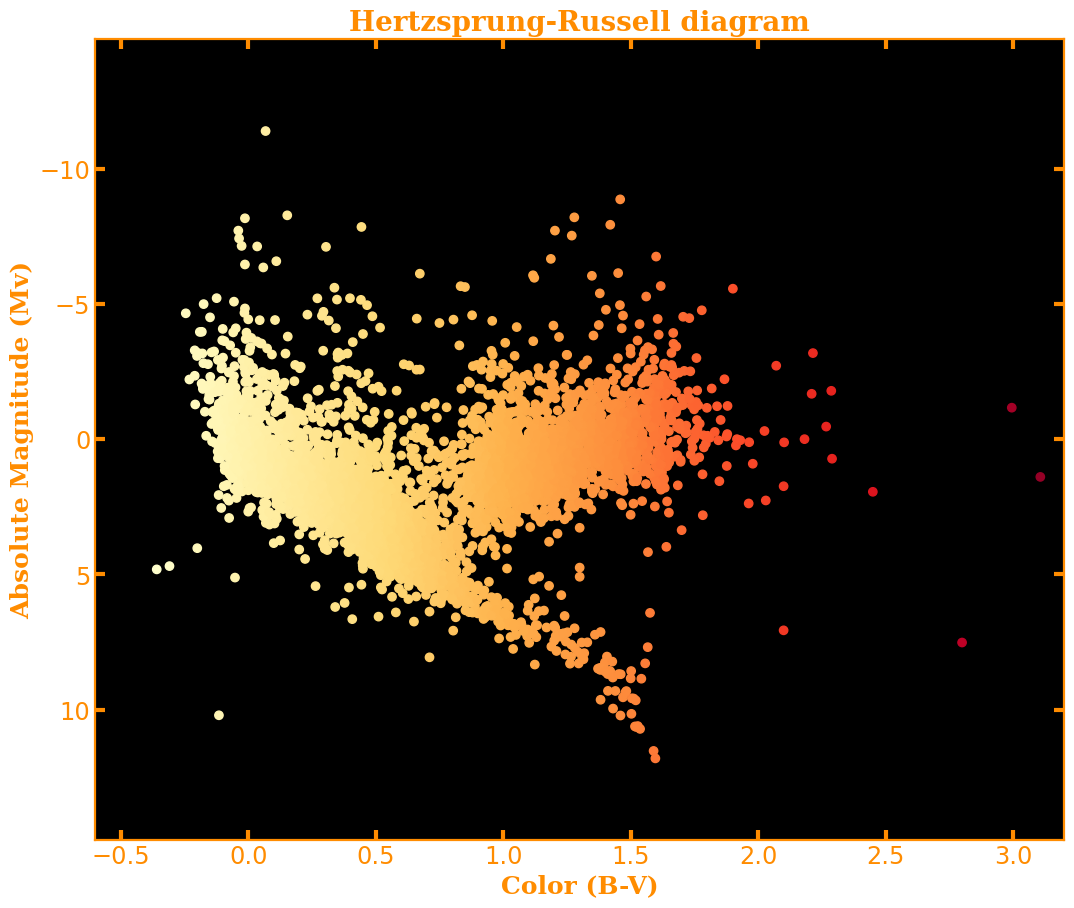

In [11]:
fig, ax = plt.subplots(figsize=(12.5,10.4))
ax.scatter(magnitude_B_V,magnitude_absolute, c=data_lim['B-V'], cmap = "YlOrRd")
plt.xlabel("Color (B-V)", fontdict = Fonte1)
plt.ylabel("Absolute Magnitude (Mv)", fontdict = Fonte1)
plt.title("Hertzsprung-Russell diagram", fontdict = Fonte2)
plt.xlim(-0.6, 3.2)
plt.ylim(14.8, -14.8) 
ax.tick_params(axis = "both", direction = "in", labelcolor='darkorange', labelsize='xx-large', top = True, right = True)
ax.tick_params(which='major', direction = "in", color='darkorange', length=7, width = 3)
ax.tick_params(which='minor', direction = "in", length=4, color='darkorange', width = 2, top = True, right = True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_color("darkorange")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.6)
Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)
#plt.legend(frameon = False, prop = Fonte3, labelcolor = "white")
#plt.tight_layout()
plt.show()

### Homework
As a homework it is enough to chose one of these two tasks. However, we recommend you to tray both of them. The first one in on the standard techniques for classification. Everything you need for that can be found in the [SciKit-learn](https://scikit-learn.org/stable/) library . The second required the usage of neural networks for which you can use the [TensorFlow](https://scikit-learn.org/stable/). To solve the tasks, it should be enough to adapt the codes from our short course. However, don't be afraid to be creative.    

    1. Analyze the data using PCA, K-means and DBSCAM, i.e., try an unsupervised classification. Don't use all data, 10-15% should be enough.   
    2. Try a classification with a deep neural networks. The input can be the Absolute Magnitude and the color. The label is the class stated in the SpType column. However, use only the first letter in each cell there. This identifies to main class. Ignore the subclasses. The classification itself should not be that hard. The real challenge are the data. For example, there are missing instances, you need to simplify the labels, and so on.   

In [12]:
from sklearn.cluster import KMeans

In [13]:
def plot_data(X, r, c):
    axis[r][c].plot(X[:, 0], X[:, 1], 'k.', markersize=1)

In [14]:
def plot_centroids(centroids, r, c, weights=None, circle_color='green', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]     #??
    axis[r][c].scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8, color=circle_color, zorder=10)
    axis[r][c].scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, color=cross_color, zorder=11)

In [15]:
def plot_decision_boundaries(X, n, r, c, resolution=1000, show_centroids=True, show_labels=False):
    groups = KMeans(n_clusters=n, random_state=42).fit(X)    
    
    mins = X.min(axis=0) - 0.2
    maxs = X.max(axis=0) + 0.2
    xx, yy = np.meshgrid(np.linspace(mins[0]*10, maxs[0]*10, resolution), #attempt: lower mins, increase maxs 
                         np.linspace(mins[1], maxs[1], resolution))       #to prevent horizontal lines
    Z = groups.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(yy.shape)

    axis[r][c].contourf(Z, extent=(mins[0], maxs[0]+2, mins[1], maxs[1]), cmap="GnBu") #+2 because sometimes it leaves
    axis[r][c].contour(Z, extent=(mins[0], maxs[0]+2, mins[1], maxs[1]), colors='k')   #white edges on the right
    plot_data(X, r, c)
    
    axis[r][c].set_title("number of centers: " + str(n))
    
    if show_centroids:
        plot_centroids(groups.cluster_centers_, r, c)

    if show_labels:
        axis[r][c].set_xlabel("Color (B-V)", fontsize=14)
        axis[r][c].set_ylabel("Absolute Magnitude (Mv)", fontsize=14)
    #else:
    #    axis[r][c].tick_params(labelbottom=True)
    #    axis[r][c].tick_params(labelleft=True)

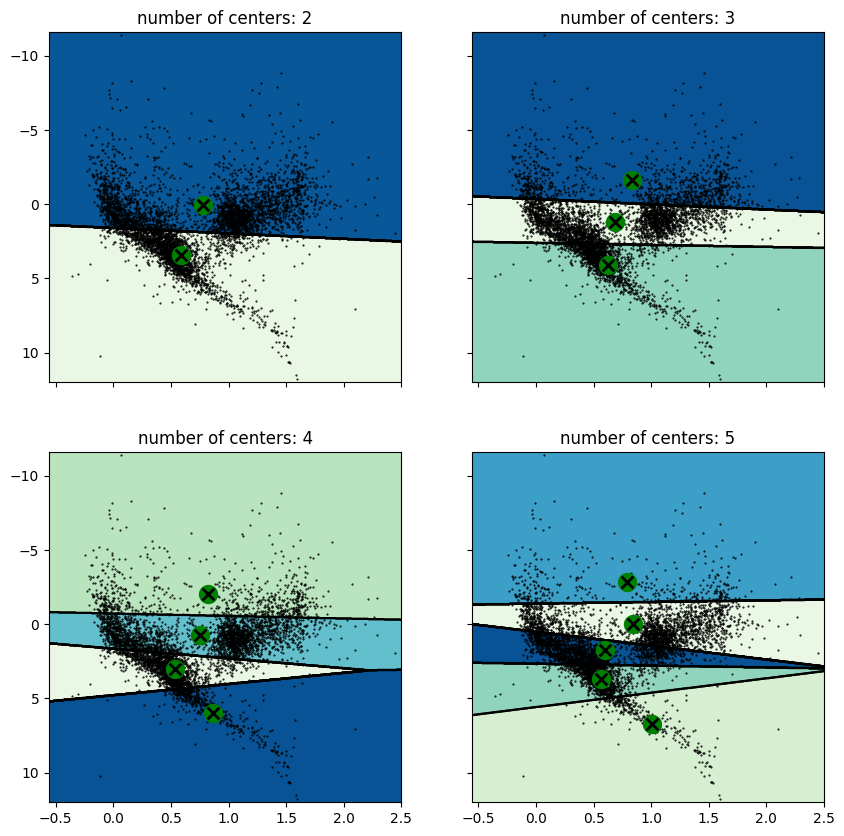

In [16]:
fig, axis = plt.subplots(ncols=2,nrows=2,figsize=(10,10), sharex=True, sharey=True)
X = np.array(list(zip(magnitude_B_V, magnitude_absolute))) 

plot_decision_boundaries(X, 2, 0, 0)
plot_decision_boundaries(X, 3, 0, 1)
plot_decision_boundaries(X, 4, 1, 0)
plot_decision_boundaries(X, 5, 1, 1)

plt.xlim(right=2.5)
plt.gca().invert_yaxis()
plt.show()

#This doesn't look so good, but I'm honestly out of ideas...

In [17]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [18]:
X2 = np.array(list(zip(X[:,0], X[:,1], trigonometric_parallax))) 
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X2)

print("PCA explained variance ratio:", *pca.explained_variance_ratio_, sep='\n ')

PCA explained variance ratio:
 0.9630016220442122
 0.03437474719112624
 0.0026236307646614575


In [19]:
kernel_pca = KernelPCA(n_components=3, kernel="rbf", gamma=3, fit_inverse_transform=False)
x_kernel_pca = kernel_pca.fit_transform(X2)

kernel_pca_2 = KernelPCA(n_components=None, kernel="rbf", gamma=8, fit_inverse_transform=True, alpha=0.5)
x_kernel_pca_2 = kernel_pca_2.fit_transform(X2)

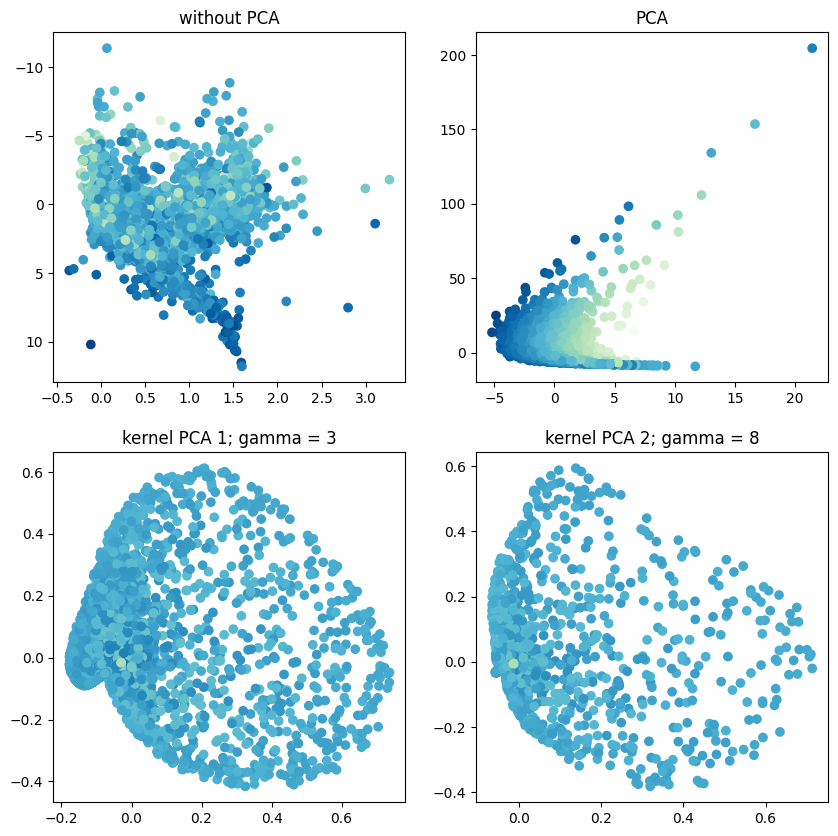

In [20]:
fig, axis = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
        
axis[0][0].scatter(X[:,0], X[:,1], c=data_lim['Vmag'], cmap="GnBu")
axis[0][0].invert_yaxis()
axis[0][1].scatter(x_pca[:,1], x_pca[:,0], c=data_lim['Vmag'], cmap="GnBu", label="PCA")
axis[1][0].scatter(x_kernel_pca[:,0], x_kernel_pca[:,1], c=data_lim['Vmag'], cmap="GnBu")
axis[1][1].scatter(x_kernel_pca_2[:,0], x_kernel_pca_2[:,1], c=data_lim['Vmag'], cmap="GnBu")

titles = ["without PCA", "PCA", "kernel PCA 1; gamma = 3", "kernel PCA 2; gamma = 8"]
counter = 0
for i in range(0, 2):
    for j in range(0, 2):
        axis[i][j].set_title(titles[counter])
        counter += 1

plt.show()

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [22]:
def dbscan_clustering(eps, minSamp, r, c):
    dbs = DBSCAN(eps=eps, min_samples=minSamp).fit(X)
    
    core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
    core_samples_mask[dbs.core_sample_indices_] = True
    labels = dbs.labels_
    unique_labels = set(labels)
        
    n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    #print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
 
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1] # Black used for noise.

        class_member_mask = labels == k
        col_edge = tuple(0.7 * elem for elem in col)
        
        xy = X[class_member_mask & core_samples_mask]
        axis[r][c].plot(xy[:, 0], xy[:, 1], ".", color=tuple(col), markeredgecolor=tuple(col_edge), markersize=12)
    
        xy = X[class_member_mask & ~core_samples_mask]
        axis[r][c].plot(xy[:, 0], xy[:, 1], ".", color=tuple(col), markeredgecolor="k", markersize=6)
        
        axis[r][c].set_title("eps: " + str(eps) + ", minSamp: " + str(minSamp) + ", clusters: " + str(n_clusters_))

Estimated number of noise points: 1204
Silhouette Coefficient: -0.054
Estimated number of noise points: 671
Silhouette Coefficient: -0.252
Estimated number of noise points: 732
Silhouette Coefficient: 0.063
Estimated number of noise points: 245
Silhouette Coefficient: 0.365


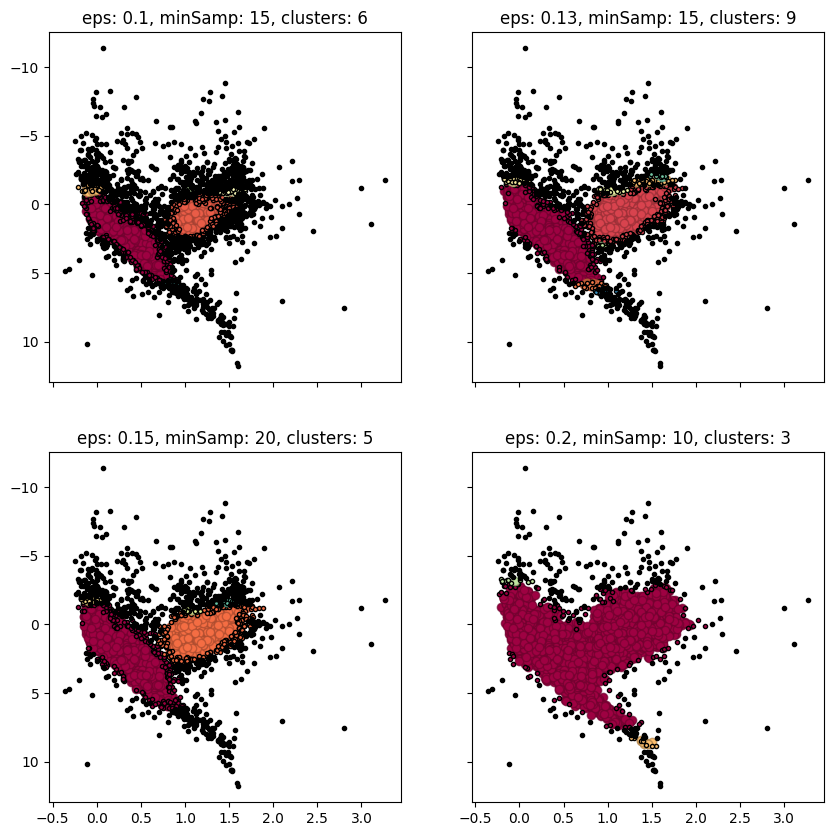

In [144]:
fig, axis = plt.subplots(ncols=2,nrows=2,figsize=(10,10), sharex=True, sharey=True)

dbscan_clustering(0.1, 15, 0, 0)
dbscan_clustering(0.13, 15, 0, 1)
dbscan_clustering(0.15, 20, 1, 0)
dbscan_clustering(0.2, 10, 1, 1)
plt.gca().invert_yaxis()
plt.show()

In [24]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

2023-01-25 09:44:50.299743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 09:44:50.559109: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-25 09:44:51.587220: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-25 09:44:51.587343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [25]:
#using data: magnitude_B_V, magnitude_absolute == X[:,0], X[:,1]

spectral_type = np.array(data_lim["SpType"], dtype=str)
print("Spectral types: ", spectral_type[0:20], "... \n")
#print(spectral_type.shape)
#print(X[:,0].shape)
#print(X[:,1].shape)

Spectral types:  ['F8' 'G5' 'K2' 'M...' 'F6V' 'K7' 'K0/K1V' 'K0III' 'F7V' 'B1V' 'G0'
 'F3III-IV' 'A0Vn' 'G8/K0V' 'F0V' 'B9.5V' 'A0Vn...' 'A1III' 'K2' 'M2III'] ... 



In [26]:
def unique(list1):
    unique_elements = []
    
    for x in list1:
        if x not in unique_elements:
            unique_elements.append(x)
    
    return unique_elements

In [27]:
def spType_oneLetter(list1):
    temp1 = list()
    for i in range(0,len(list1)):
        temp2 = spectral_type[i][0:1]
        temp1.append(temp2)

    spectral_type_oneL = np.array(temp1)
    return spectral_type_oneL

In [28]:
spTypes = spType_oneLetter(spectral_type)
print("...These were reduced to: ", spTypes[0:20], "... \n")
uniq = unique(spTypes)
print(uniq)

...These were reduced to:  ['F' 'G' 'K' 'M' 'F' 'K' 'K' 'K' 'F' 'B' 'G' 'F' 'A' 'G' 'F' 'B' 'A' 'A'
 'K' 'M'] ... 

['F', 'G', 'K', 'M', 'B', 'A', 'O', 'W', 'N', 'C', 's', 'R']


In [29]:
print("Minimum B-V value: {}".format(magnitude_B_V.min()))
print("Maximum B-V value: {}".format(magnitude_B_V.max()))
print("Minimum Mag value: {}".format(magnitude_absolute.min()))
print("Maximum Mag value: {}".format(magnitude_absolute.max()))

Minimum B-V value: -0.359
Maximum B-V value: 3.269
Minimum Mag value: -11.39
Maximum Mag value: 11.798735356262279


In [30]:
def str_to_int(input_list, unique_list):
    number_labels = []
    for i in range(0, len(unique_list)):
        number_labels.append(i)
        
    input_but_numbered = []
    for i in range(0, len(input_list)):
        for j in range(0, len(number_labels)):
            if str(input_list[i]) == str(unique_list[j]):
                input_but_numbered.append(number_labels[j])
    input_but_numbered = np.array(input_but_numbered)
    
    return input_but_numbered

In [44]:
def str_to_int_2(input_list, unique_list):
    letters = ["W", "O", "B", "A", "F", "G", "K", "M", "C", "R", "N"]
    numbers = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    
    input_but_numbered = []
    for i in range(0, len(input_list)):
        counter_of_nones = 0
        for j in range(0, len(numbers)):
            if str(input_list[i]) == str(letters[j]):
                input_but_numbered.append(numbers[j])
            else:
                counter_of_nones += 1
            if counter_of_nones == len(numbers):
                #print("not classified: ", input_list[i])
                input_but_numbered.append(int(np.random.rand()*10))
    input_but_numbered = np.array(input_but_numbered)
    
    return input_but_numbered

In [52]:
numbered_spTypes = str_to_int(spTypes, uniq)
#numbered_spTypes = str_to_int_2(spTypes, uniq)
print(numbered_spTypes[0:20], "\n", spTypes[0:20])
#print(type(numbered_spTypes), type(spTypes))

[0 1 2 3 0 2 2 2 0 4 1 0 5 1 0 4 5 5 2 3] 
 ['F' 'G' 'K' 'M' 'F' 'K' 'K' 'K' 'F' 'B' 'G' 'F' 'A' 'G' 'F' 'B' 'A' 'A'
 'K' 'M']


In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, numbered_spTypes, test_size=0.2, random_state=42)
print("x_train: ", len(x_train))
print("x_test: ", len(x_test))

print(x_test[0:10])
print(y_test[0:10])

x_train:  4428
x_test:  1108
[[ 1.308       7.51584851]
 [ 0.534       3.85299718]
 [-0.035      -0.34341333]
 [ 1.036       0.81764481]
 [ 0.185       2.11556133]
 [ 0.701       4.26009235]
 [ 0.213       0.28035694]
 [ 0.48        2.57596321]
 [ 1.445      -0.78921075]
 [ 0.209      -0.02976948]]
[2 0 4 2 5 1 5 1 2 5]


In [54]:
print("Shape of the training dataset: {}".format(x_train.shape))
print("Shape of the test dataset: {}".format(x_test.shape))
print("Shape of the list of the training labels: {}".format(y_train.shape))
print("Shape of the list of the test labels: {}".format(y_test.shape))

print(x_train.shape, y_train.shape)
#print(type(x_train), type(y_train))

Shape of the training dataset: (4428, 2)
Shape of the test dataset: (1108, 2)
Shape of the list of the training labels: (4428,)
Shape of the list of the test labels: (1108,)
(4428, 2) (4428,)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model = keras.models.Sequential()
model.add(Dense(units=128, activation="relu", input_shape=(2,))) #or input_dim = 2
#model.add(Dense(units=1, activation="relu", input_shape=(2,)))
model.add(Dense(units=1, activation="linear"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=100, verbose=1, batch_size=4)

Epoch 1/100
1107/1107 [==============================] - 3s 2ms/step - loss: 2.5222 - accuracy: 0.1963
Epoch 2/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.5684 - accuracy: 0.1956
Epoch 3/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.4271 - accuracy: 0.1963
Epoch 4/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.3374 - accuracy: 0.1963
Epoch 5/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.2633 - accuracy: 0.2048
Epoch 6/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.1928 - accuracy: 0.2141
Epoch 7/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.1409 - accuracy: 0.2310
Epoch 8/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.1027 - accuracy: 0.2473
Epoch 9/100
1107/1107 [==============================] - 2s 2ms/step - loss: 1.0683 - accuracy: 0.2602
Epoch 10/100
1107/1107 [==============================] - 2s 2ms/step - l

In [58]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=8)

print("Test loss: {:.5f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(test_accuracy*100))

139/139 [==============================] - 1s 3ms/step - loss: 1.4047 - accuracy: 0.2906
Test loss: 1.40475
Test accuracy: 29.06%


In [70]:
predictions = model.predict(x_test)
print(predictions[0:10], predictions.shape)

35/35 [==============================] - 0s 3ms/step
[[2.4718337 ]
 [0.4389444 ]
 [3.8539872 ]
 [1.6076155 ]
 [5.230255  ]
 [0.9086971 ]
 [4.8115096 ]
 [0.20845099]
 [2.1668239 ]
 [4.6636076 ]] (1108, 1)


In [126]:
predictions_round = []
for i in range(0, len(predictions)):
    predictions_round.append(int(np.round(predictions[i])))
    
print(predictions_round[0:10])

[2, 0, 4, 2, 5, 1, 5, 0, 2, 5]


In [127]:
def int_to_str(input_list, unique_list):
    input_string_again = []
    for i in range(0, len(input_list)):
        temp = input_list[i]
        input_string_again.append(unique_list[temp])
    input_string_again = np.array(input_string_again)
    
    return input_string_again

In [128]:
string_spTypes = int_to_str(predictions_round, uniq)
string_spTypes_y_test = int_to_str(y_test, uniq)

print("Previously from str to int:", numbered_spTypes[0:20], "\n", spTypes[0:20])
print("Now, back from int to str:", string_spTypes[0:20], "\n", predictions_round[0:20])
print("Compared with actual spectral types:", string_spTypes_y_test[0:20])

Previously from str to int: [0 1 2 3 0 2 2 2 0 4 1 0 5 1 0 4 5 5 2 3] 
 ['F' 'G' 'K' 'M' 'F' 'K' 'K' 'K' 'F' 'B' 'G' 'F' 'A' 'G' 'F' 'B' 'A' 'A'
 'K' 'M']
Now, back from int to str: ['K' 'F' 'B' 'K' 'A' 'G' 'A' 'F' 'K' 'A' 'B' 'G' 'F' 'K' 'F' 'K' 'B' 'M'
 'G' 'A'] 
 [2, 0, 4, 2, 5, 1, 5, 0, 2, 5, 4, 1, 0, 2, 0, 2, 4, 3, 1, 5]
Compared with actual spectral types: ['K' 'F' 'B' 'K' 'A' 'G' 'A' 'G' 'K' 'A' 'B' 'G' 'F' 'K' 'F' 'G' 'A' 'K'
 'G' 'A']


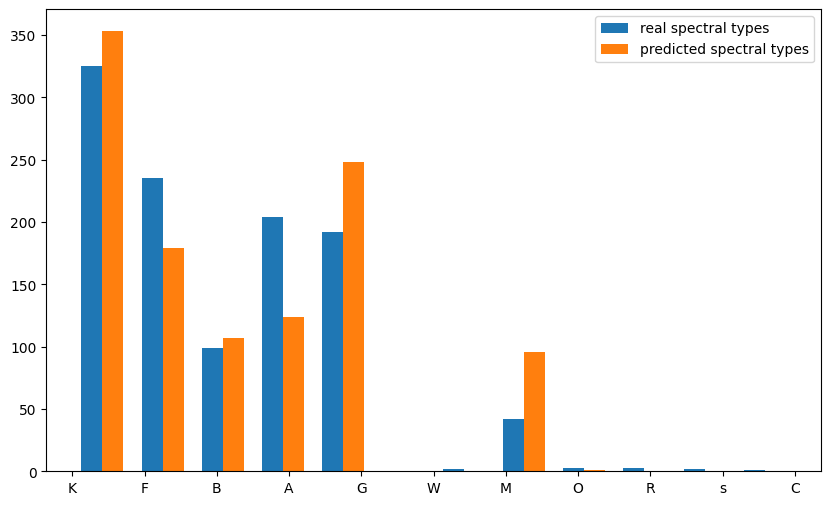

In [145]:
hist_input = np.array(list(zip(string_spTypes_y_test, string_spTypes))) 

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
axes.hist(hist_input, len(uniq), histtype='bar', rwidth=0.7, label=["real spectral types", "predicted spectral types"])
plt.legend()

In [121]:
incorr_ind = np.where(string_spTypes != string_spTypes_y_test)[0]  # position of incorrectly classified images

print("Number of incorrectly classified images out of {:d} in the test dataset: {:d}".format(len(string_spTypes), len(incorr_ind)))

Number of incorrectly classified images out of 1108 in the test dataset: 387
